In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('white')

# Plotting the data

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


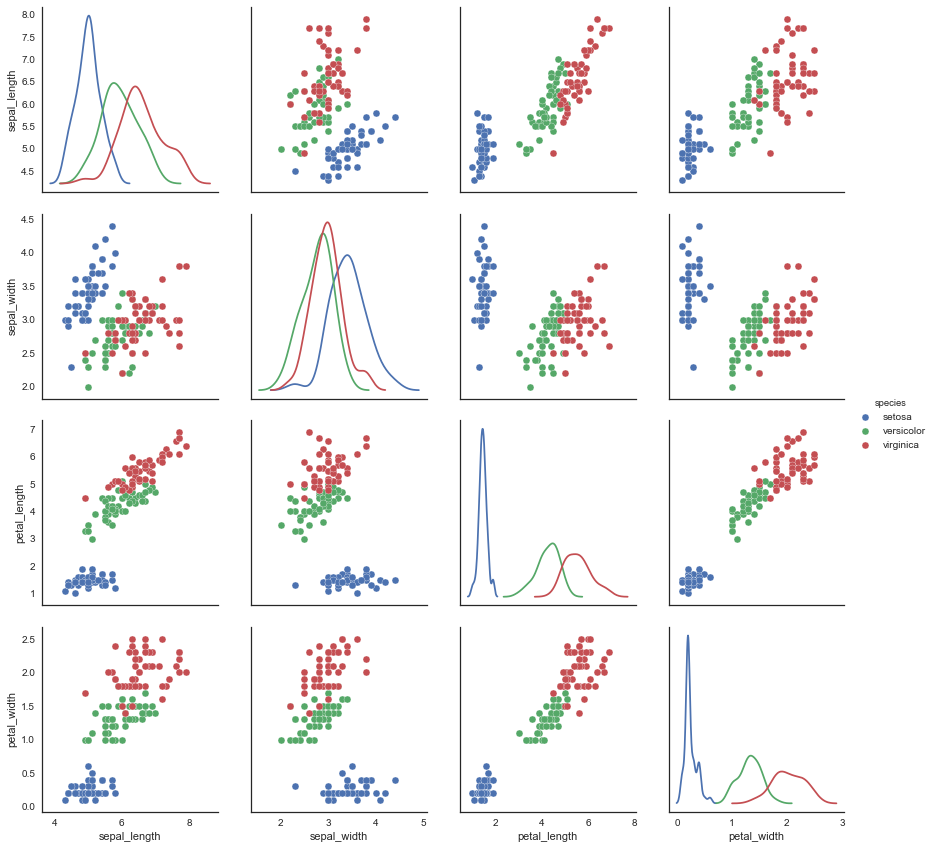

In [2]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', size=3, diag_kind="kde")

# Loading and preparing the data

In [3]:
iris_dataset = load_iris()

Separate features and labels

In [4]:
X = iris_dataset.data
y = iris_dataset.target

X is a vector of features (_sepal_ and _petal_ _width_ and _length_), y is a vector of labels (_setosa_, _versicolor_, _virginica_)

In [5]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [7]:
labels = iris_dataset.target_names

Separate the dataset into a training and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
X.shape, y.shape

((150, 4), (150,))

In [10]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [11]:
X_test.shape, y_test.shape

((60, 4), (60,))